In [16]:
import os 
import cv2
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [2]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

Tous les kanjis

In [3]:

path = "ETL8G"
files = os.listdir(path)
dico = []
for i in files:
    f = i.split("x")
    if len(f) == 2:
        dico.append(chr(int(f[1], 16)))
print(len(dico))
print(dico)

956
['あ', 'い', 'う', 'え', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'ぢ', 'っ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'べ', 'ぺ', 'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'ゃ', 'や', 'ゅ', 'ゆ', 'ょ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'わ', 'を', 'ん', '一', '丁', '七', '万', '三', '上', '下', '不', '世', '両', '中', '主', '久', '乗', '九', '予', '争', '事', '二', '五', '交', '京', '人', '仁', '今', '仏', '仕', '他', '付', '代', '令', '以', '仮', '件', '任', '休', '会', '伝', '似', '位', '低', '住', '体', '何', '余', '作', '使', '例', '供', '依', '価', '便', '係', '俗', '保', '信', '修', '俵', '倉', '個', '倍', '候', '借', '停', '健', '側', '備', '働', '像', '億', '元', '兄', '先', '光', '児', '党', '入', '全', '八', '公', '六', '共', '兵', '具', '典', '兼', '内', '円', '再', '写', '冬', '冷', '処', '出', '刀', '分', '切', '刊', '列', '初', '判', '別', '利', '制', '刷', '券', '則', '前', '創', '力', '功', '加', '助', '努', '労', '効', '勇', '勉', '動', '務', '勝', '勢', '勤', '勧', 

Exemple 1 image

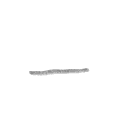

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

CPU times: total: 78.1 ms
Wall time: 173 ms


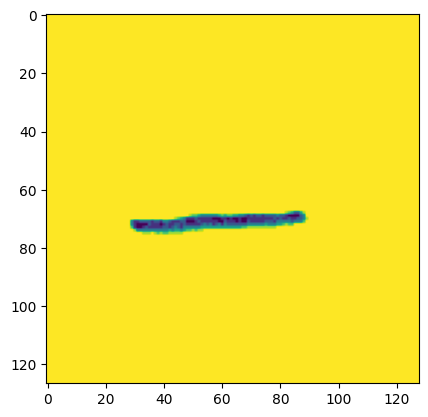

In [4]:
%%time
img = np.asarray(Image.open(path+"/0x4e00/000862.png"))
display(Image.open(path+"/0x4e00/000862.png"))
display(img)
imgplot = plt.imshow(img)

## Vérifier que toutes les images sont de même taille

In [5]:
def encodeJp(japChar : str) :
    """
    Encode japanese char to utf-16 i guess
    :param japChar: the char
    :return: string
    """

    return japChar.encode('unicode_escape').decode('ascii')

In [9]:
%%time
data = []

for folder_name in os.listdir('ETL8G'):
    folder_path = os.path.join('ETL8G', folder_name)
    if os.path.isdir(folder_path):
        # Parcourir les fichiers dans le dossier
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            # Vérifier si c'est un fichier image
            if filename.endswith('.png'):
                # Charger l'image avec PIL
                image =  np.asarray(Image.open(file_path))
                # Récupérer la taille de l'image
                image_size = image.size
                # Ajouter les données au DataFrame
                data.append({'Image': image, 'Shape': image_size, 'FolderName': folder_name,
                                 'Kanji': chr(int(folder_name[2:], 16))})


CPU times: total: 1min 52s
Wall time: 16min 12s


In [10]:
df = pd.DataFrame(data)

In [11]:
df

,Image,Shape,FolderName,Kanji
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042,あ
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042,あ
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042,あ
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042,あ
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x3042,あ
...,...,...,...,...
153911,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x9f3b,鼻
153912,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x9f3b,鼻
153913,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x9f3b,鼻
153914,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",16256,0x9f3b,鼻


In [12]:
def split(data,Y):
    trainset, testset = train_test_split(data, train_size=0.8, random_state=0, stratify=Y)
    return trainset, testset

In [38]:
trainset, testset = split(df, df.Kanji)
print(trainset.shape)
print(testset.shape)
print(trainset.Kanji.value_counts(normalize=True))
print(testset.Kanji.value_counts(normalize=True))

# separation X, Y
x_train = trainset.Image
y_train = trainset.Kanji
x_test = trainset.Image
y_test = testset.Kanji

(123132, 4)
(30784, 4)
Kanji
雲    0.001048
約    0.001048
著    0.001048
需    0.001048
四    0.001048
       ...   
む    0.001040
新    0.001040
汽    0.001040
み    0.001040
泳    0.001040
Name: proportion, Length: 956, dtype: float64
Kanji
五    0.001072
序    0.001072
帰    0.001072
店    0.001072
罪    0.001072
       ...   
労    0.001040
散    0.001040
貝    0.001040
期    0.001040
械    0.001040
Name: proportion, Length: 956, dtype: float64


In [19]:
len(df['Kanji'].unique())

956

In [28]:
df['Image'][0].shape[0]

127

In [26]:
model = keras.models.Sequential()

model.add(keras.layers.Convolution2D(
    input_shape=(df['Image'][0].shape[0], df['Image'][0].shape[1], 1),
    kernel_size=5,
    filters=15,
    strides=1,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.VarianceScaling()))

model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding="valid"
))

model.add(keras.layers.Convolution2D(
    kernel_size=5,
    filters=30,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='valid'
))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(
    units=90,
    activation=keras.activations.relu
));

model.add(keras.layers.Dropout(0.2, seed=456))

model.add(keras.layers.Dense(
    units=len(df['Kanji'].unique()),
    activation=keras.activations.softmax,
    kernel_initializer=keras.initializers.VarianceScaling()
))

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 123, 124, 15)        │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 61, 62, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 57, 58, 30)          │          11,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 29, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 24360)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 90)                  │       2,192,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 90)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 956)                 │          86,996 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,291,156 (8.74 MB)

 Trainable params: 2,291,156 (8.74 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'])


In [41]:
type(x_train)

pandas.core.series.Series

In [44]:
type(x_train[0])

numpy.ndarray

In [43]:
x_train_bis = [tf.convert_to_tensor(x) for x in x_train]

In [47]:
x_train_bis

[<tf.Tensor: shape=(127, 128), dtype=uint8, numpy=
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)>,
 <tf.Tensor: shape=(127, 128), dtype=uint8, numpy=
 array([[239, 239, 255, ..., 255, 255, 255],
        [239, 239, 239, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)>,
 <tf.Tensor: shape=(127, 128), dtype=uint8, numpy=
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [25

In [45]:
y_train

90552     泳
52811     察
109272    立
116254    織
33571     卒
         ..
73256     数
95942     照
63945     徳
62485     役
130421    課
Name: Kanji, Length: 123132, dtype: object

In [ ]:
%%time

model.fit(x_train_bis, y_train, epochs=10, validation_split=0.2, batch_size=150)

Epoch 1/10
